<a href="https://colab.research.google.com/github/Kavin56/GENERATIVE-AI/blob/main/OpenAI_with_Azure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00


In [53]:
# Add OpenAI library
from openai import AzureOpenAI

deployment_name = 'gpt-35-turbo'

# Initialize the Azure OpenAI client
client = AzureOpenAI(
        azure_endpoint = 'https://kavinkumarvs.openai.azure.com/',
        api_key='941f4e4jk2b4p3j5n2ke2c9553e3a2c3',
        api_version="2024-02-15-preview"
        )

In [54]:
response = client.chat.completions.create(
    model=deployment_name,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What is Azure OpenAI?"}
    ]
)
generated_text = response.choices[0].message.content

print("Response: " + generated_text + "\n")

Response: Azure OpenAI is a platform that provides access to the latest advancements in artificial intelligence (AI) and machine learning (ML) technology through a partnership between Microsoft Azure and OpenAI, an AI research lab. It offers a range of AI-powered tools and services for developers to build intelligent applications and solutions, such as natural language processing, computer vision, and deep learning algorithms. With Azure OpenAI, developers can easily integrate AI capabilities into their applications, without the need for extensive knowledge in AI and ML.



In [55]:
response = client.chat.completions.create(
    model=deployment_name,
    messages=[
    {
      "role": "user",
      "content": "who won the first cricket worldcup?"
    }
      ]
    ,
    max_tokens=150,
)

In [56]:
response

ChatCompletion(id='chatcmpl-A5cUWUkhdGs5D5g6Vmb8PVdZINklB', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The first cricket World Cup was won by the West Indies team in 1975.', refusal=None, role='assistant', function_call=None, tool_calls=None), content_filter_results={'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}})], created=1725902964, model='gpt-35-turbo', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=17, prompt_tokens=16, total_tokens=33), prompt_filter_results=[{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'saf

In [57]:
response.choices

[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The first cricket World Cup was won by the West Indies team in 1975.', refusal=None, role='assistant', function_call=None, tool_calls=None), content_filter_results={'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}})]

In [58]:
response.choices[0].message.content

'The first cricket World Cup was won by the West Indies team in 1975.'

# Information Extraction

In [59]:
des = "John Doe, a 35-year-old software engineer from San Francisco, joined Tech Innovations Inc. in 2018. He has a Master's degree in Computer Science from Stanford University and specializes in artificial intelligence and machine learning. At Tech Innovations, John has worked on various projects, including the development of an AI-driven customer support system that increased user satisfaction by 20%.In his free time, John enjoys hiking and volunteers at a local coding bootcamp to teach programming to underprivileged youth. Recently, he was promoted to Senior Engineer, leading a team of five in developing scalable AI solutions for enterprise clients"

In [60]:
prompt = f'''
Please extract the following information from the given text and return it as a JSON object:

Name:
Age:
Occupation:
Company:
Start Year:
Education:
Specialization:
Notable Projects:
Promotion:
Hobbies:
Location:

This is the body of text to extract the information from:
{des}
'''

In [61]:
prompt

"\nPlease extract the following information from the given text and return it as a JSON object:\n\nName:\nAge:\nOccupation:\nCompany:\nStart Year:\nEducation:\nSpecialization:\nNotable Projects:\nPromotion:\nHobbies:\nLocation:\n\nThis is the body of text to extract the information from:\nJohn Doe, a 35-year-old software engineer from San Francisco, joined Tech Innovations Inc. in 2018. He has a Master's degree in Computer Science from Stanford University and specializes in artificial intelligence and machine learning. At Tech Innovations, John has worked on various projects, including the development of an AI-driven customer support system that increased user satisfaction by 20%.In his free time, John enjoys hiking and volunteers at a local coding bootcamp to teach programming to underprivileged youth. Recently, he was promoted to Senior Engineer, leading a team of five in developing scalable AI solutions for enterprise clients\n"

In [62]:
response = client.chat.completions.create(
    model=deployment_name,
    messages=[
    {
      "role": "user",
      "content": prompt
    }
      ]
    ,
    max_tokens=150,
)

In [63]:
output = response.choices[0].message.content
output

'{\n  "Name": "John Doe",\n  "Age": 35,\n  "Occupation": "Software Engineer",\n  "Company": "Tech Innovations Inc.",\n  "Start Year": 2018,\n  "Education": "Master\'s degree in Computer Science from Stanford University",\n  "Specialization": "Artificial intelligence and machine learning",\n  "Notable Projects": "Development of an AI-driven customer support system that increased user satisfaction by 20%",\n  "Promotion": "Senior Engineer",\n  "Hobbies": "Hiking, volunteering at local coding bootcamp",\n  "Location": "San Francisco"\n}'

In [64]:
import json
json.loads(output)

{'Name': 'John Doe',
 'Age': 35,
 'Occupation': 'Software Engineer',
 'Company': 'Tech Innovations Inc.',
 'Start Year': 2018,
 'Education': "Master's degree in Computer Science from Stanford University",
 'Specialization': 'Artificial intelligence and machine learning',
 'Notable Projects': 'Development of an AI-driven customer support system that increased user satisfaction by 20%',
 'Promotion': 'Senior Engineer',
 'Hobbies': 'Hiking, volunteering at local coding bootcamp',
 'Location': 'San Francisco'}

In [66]:
prompt = "Write a table in markdown with 6 animals in it, with their genus and species"

In [67]:
response = client.chat.completions.create(
    model=deployment_name,
    messages=[
    {
      "role": "user",
      "content": prompt
    }
      ]
    ,
    max_tokens=150,
)

In [74]:
op = response.choices[0].message.content

In [75]:
op

'| Animal | Genus | Species |\n| --- | --- | --- |\n| Lion | Panthera | leo |\n| Elephant | Loxodonta | africana |\n| Chimpanzee | Pan | troglodytes |\n| Penguin | Spheniscus | humboldti |\n| Koala | Phascolarctos | cinereus |\n| Jaguar | Panthera | onca |'

In [ ]:
chtr = "ben1-"

In [78]:
response = client.chat.completions.create(
    model=deployment_name,
    messages=[
    {
      "role": "user",
      "content": "Put two fictional characters into JSON of the following format{ firstNameFictional: jobFictional: }"
    }
      ]
    ,
    max_tokens=150,
)

In [80]:
response.choices[0].message.content

'{\n  "firstNameFictional": "Harry",\n  "jobFictional": "Wizard"\n}\n\n{\n  "firstNameFictional": "Sherlock",\n  "jobFictional": "Detective"\n}'

# Conversation history

 Along with the system message, other messages can be provided to the model to enhance the conversation. Conversation history enables the model to continue responding in a similar way (such as tone or formatting) and allow the user to reference previous content in subsequent queries. This history can be provided in two ways: from an actual chat history, or from a user defined example conversation.





## Few shot learning
Using a user defined example conversation is what is called few shot learning, which provides the model examples of how it should respond to a given query. These examples serve to train the model how to respond.

For example, by providing the model a couple prompts and the expected response, it continues in the same pattern without instructing it what to do:


In [83]:
response = client.chat.completions.create(
    model="gpt-35-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "That was an awesome experience"},
        {"role": "assistant", "content": "positive"},
        {"role": "user", "content": "I won't do that again"},
        {"role": "assistant", "content": "negative"},
        {"role": "user", "content": "That was not worth my time"},
        {"role": "assistant", "content": "negative"},
        {"role": "user", "content": "You can't miss this"}
    ]
)

In [84]:
response.choices[0].message.content

'positive'

# Image Generation with Dall-e-3 model

In [103]:
import os
import httpx
from openai import AzureOpenAI
from PIL import Image
import matplotlib.pyplot as plt


In [104]:
deployment_name = 'dall-e-3'

client = AzureOpenAI(
    api_version="2024-02-01",
    api_key="941f4e4fj2p330w1d4je2c9553e4v2c3",
    azure_endpoint='https://kavinkumarvs.openai.azure.com/openai/deployments/dall-e-3/images/generations?api-version=2024-02-01'
)

In [105]:
result = client.images.generate(
    model='dall-e-3',
    prompt="a close-up of a bear walking through the forest",
    n=1
 )

In [106]:
# Set the directory for the stored image
image_dir = os.path.join(os.curdir, 'images')
# If the directory doesn't exist, create it
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# Initialize the image path (note the filetype should be png)
image_path = os.path.join(image_dir, 'generated_image.png')

# Retrieve the generated image
image_url = result.data[0].url  # extract image URL from response
generated_image = httpx.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

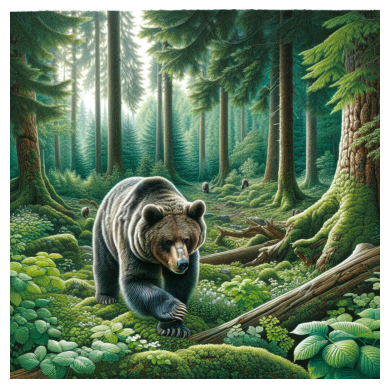

In [107]:
image = Image.open(path)

plt.imshow(image)
plt.axis('off')  # Turn off the axis, will display scales if not turned off
plt.show()